In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize

In [30]:
#asym_data = np.array([2.9957322735459346, 1.675290286238888, 1.2394284453490225, 1.008839491964333, 0.8643278688899831, 0.7649894003621067, 0.6925834393453995, 0.6376467300686982, 0.5947483681622728, 0.5605351460010555, 0.5328169651933345, 0.5100969400326827, 0.4913120469539105, 0.4756819906739773, 0.4626165051742055, 0.4516572693694689, 0.44243950324657016, 0.4346676929222073, 0.4280984623015261, 0.4225294424373636, 0.4177915048077877, 0.41374300111873, 0.41026564809702054, 0.4072610418966976, 0.4046476741413018, 0.40235850658435063, 0.4003386577908077, 0.3985429811490426, 0.39693514193667195, 0.39548538227293034, 0.3941694605585594, 0.3929677615716207, 0.391864251559807, 0.3908455869451657, 0.3899011016649482, 0.3890217271975129, 0.3881998922657792, 0.38742949022602835, 0.38670506811278726, 0.3860221983377542, 0.3853769769608236, 0.38476595194699953, 0.3841864226263971, 0.383635630869825, 0.38311141326942666, 0.3826117717920961, 0.38213493155887995, 0.38167929737955586, 0.38124340462759665])
asym_data = np.array([2.9957322735459346, 2.088772622392129, 1.6672477196766076, 1.4119323148519158, 1.237454183293103, 1.1094850211923133, 1.0111238215392768, 0.9329381456823123, 0.8692116826305945, 0.8162384382353874, 0.7715068590642378, 0.7332471071221812, 0.7001729487422754, 0.6713252104306355, 0.6459727455264089, 0.6235477944345205, 0.6036021731600203, 0.5857768935798962, 0.5697807288054267, 0.5553746508564384, 0.5423602694128729, 0.5305715313082133, 0.5198680190441812, 0.5101299107951157, 0.5012543821602896, 0.49315234490161036, 0.4857462204306196, 0.47896771094612656, 0.47275671909481576, 0.4670597664312253, 0.4618292184806794, 0.4570223031784265, 0.4526005054639188, 0.4485291672969191, 0.44477680149427223, 0.4413148880470948, 0.43811742012426796, 0.4351608089933967, 0.4324235938813865, 0.4298861738061721, 0.427530617942727, 0.42534093029572156, 0.423302195343263, 0.4214009940982299, 0.4196251401685405, 0.41796368371644055, 0.41640642116115895, 0.41494439188579274, 0.4135693518263254, 0.4122738759661872, 0.4110510737159119, 0.4098950408448265, 0.4088002447498457, 0.4077616417495181, 0.4067748275204063, 0.40583576772471447, 0.4049406179760648, 0.40408624917160135, 0.4032695690262769, 0.40248784747258387, 0.4017386631412019, 0.40101982734970887, 0.4003291764897519, 0.39966497106746907, 0.3990254446381356, 0.3984090258603674, 0.39781448371509004, 0.39724038727506294, 0.39668554123387245, 0.3961489534704401, 0.39562956083564904, 0.3951264727603359, 0.3946388463151782, 0.39416593224005186, 0.39370693308411475, 0.3932611868489566, 0.3928280781321532, 0.39240711756196933, 0.39199758938631474, 0.39159911617646553, 0.39121119821013023, 0.39083342797772547, 0.39046525904229473, 0.3901064577135114, 0.38975653827829193, 0.3894151453966457, 0.38908209632064666, 0.38875692220494507, 0.38843936322500056, 0.3881292433111504, 0.3878262103815218, 0.3875299702042078, 0.38724039493144685, 0.38695723826775463, 0.38668023955745295, 0.38640922513023845, 0.38614389748204125, 0.38588426290688593])
print(asym_data)
T = np.arange(2, 100)
x = 1 / np.arange(2, 100)

[2.99573227 2.08877262 1.66724772 1.41193231 1.23745418 1.10948502
 1.01112382 0.93293815 0.86921168 0.81623844 0.77150686 0.73324711
 0.70017295 0.67132521 0.64597275 0.62354779 0.60360217 0.58577689
 0.56978073 0.55537465 0.54236027 0.53057153 0.51986802 0.51012991
 0.50125438 0.49315234 0.48574622 0.47896771 0.47275672 0.46705977
 0.46182922 0.4570223  0.45260051 0.44852917 0.4447768  0.44131489
 0.43811742 0.43516081 0.43242359 0.42988617 0.42753062 0.42534093
 0.4233022  0.42140099 0.41962514 0.41796368 0.41640642 0.41494439
 0.41356935 0.41227388 0.41105107 0.40989504 0.40880024 0.40776164
 0.40677483 0.40583577 0.40494062 0.40408625 0.40326957 0.40248785
 0.40173866 0.40101983 0.40032918 0.39966497 0.39902544 0.39840903
 0.39781448 0.39724039 0.39668554 0.39614895 0.39562956 0.39512647
 0.39463885 0.39416593 0.39370693 0.39326119 0.39282808 0.39240712
 0.39199759 0.39159912 0.3912112  0.39083343 0.39046526 0.39010646
 0.38975654 0.38941515 0.3890821  0.38875692 0.38843936 0.3881

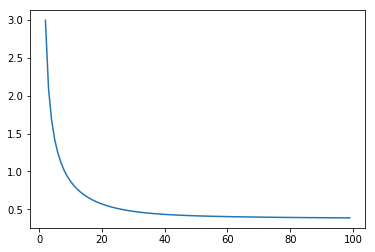

In [31]:
plt.plot(T, asym_data)
plt.show()

In [32]:
lr = LinearRegression().fit(x.reshape(-1, 1), asym_data.reshape(-1, 1))
print(lr.coef_)
print(lr.intercept_)

[[5.38339197]]
[0.31354159]


In [54]:
A = np.hstack((x.reshape(-1, 1), np.ones((x.shape[0])).reshape(-1, 1)))
b = asym_data

def con(x):
    return A.dot(x) - b

In [55]:
def least_squares(x):
    return 0.5 * np.linalg.norm(A.dot(x) - b)

In [57]:
cons = [{'type':'ineq', 'fun': con}]
x0 = [1, 1]
minimize(least_squares, x0, constraints=cons, options={'xtol': 1e-8, 'disp': True})

#minimize(asym_prob_k, k0, options={'xtol': 1e-8, 'disp': True})
#np.ones((x.shape[0])).reshape(-1, 1)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.12246184607724463
            Iterations: 3
            Function evaluations: 12
            Gradient evaluations: 3


/Users/jacksullivan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: OptimizeWarning: Unknown solver options: xtol
  app.launch_new_instance()


     fun: 0.12246184607724463
     jac: array([0.23452339, 4.03144928])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([5.45060143, 0.33082766])